In [1]:
import pandas as pd
import numpy as np

In [25]:
DATA_FOLDER = 'data/'
dtypes = {'date': 'str', 'time': 'str', 'location': 'str', 'subject_age': pd.Int32Dtype(), 'subject_race': 'category', 'subject_sex': 'category', 'officer_id_hash': 'str', 'officer_age': pd.Int32Dtype(), 'officer_sex': 'category', 'officer_years_of_service': pd.Int32Dtype(), 'type': 'category', 'violation': 'category', 'arrest_made': 'boolean', 'citation_issued': 'boolean', 'outcome': 'category'}
cols = ['date', 'time', 'location', 'subject_age', 'subject_race', 'subject_sex', 'officer_id_hash', 'officer_age', 'officer_sex', 'officer_years_of_service', 'type', 'violation', 'arrest_made', 'citation_issued', 'outcome']

il_ch = pd.read_csv(DATA_FOLDER + 'yg821jf8611_il_chicago_2020_04_01.csv.zip', usecols=cols, dtype=dtypes)
fl_sw = pd.read_csv(DATA_FOLDER + 'yg821jf8611_fl_statewide_2020_04_01.csv.zip', usecols=cols, dtype=dtypes, parse_dates=['date'], nrows=1000)
ca_lb = pd.read_csv(DATA_FOLDER + 'yg821jf8611_ca_long_beach_2020_04_01.csv.zip', usecols=[col for col in cols if col not in ['time', 'arrest_made']], dtype=dtypes)
all_data = pd.concat([il_ch, fl_sw, ca_lb], axis=0)
all_data.loc[(all_data.officer_years_of_service > 70) | (all_data.officer_years_of_service < 0), 'officer_years_of_service'] = np.NaN
all_data.loc[(all_data.subject_age > 100) | (all_data.subject_age < 0), 'subject_age'] = np.NaN
all_data

,date,time,location,subject_age,subject_race,subject_sex,officer_id_hash,officer_age,officer_sex,officer_years_of_service,type,violation,arrest_made,citation_issued,outcome
0,2012-01-06,09:00:00,700 LINCOLN W,23,black,male,a6d791f976,<NA>,male,17,vehicular,DRIVING ON SUSPENDED LICENSE,True,<NA>,arrest
1,2012-01-01,00:00:00,NaN,23,hispanic,male,81da9fab7e,<NA>,male,2,vehicular,DRIVING/NEVER ISSUED LICENSE,True,<NA>,arrest
2,2012-01-01,01:00:00,0 NORTHWEST HWY & HILLSIDE RD S,38,white,female,NaN,<NA>,NaN,<NA>,vehicular,DRIVING ON SUSPENDED LICENSE,True,<NA>,arrest
3,2012-01-01,01:00:00,108 LAMON AVE N,35,black,male,048359e7c8,34,male,8,vehicular,IVC - FAIL TO STOP/SIGNAL CROSSWALK,True,<NA>,arrest
4,2012-01-01,01:00:00,3451 177TH ST W,20,black,male,NaN,<NA>,NaN,<NA>,vehicular,IVC - DRIVING 15-20 MPH ABOVE SPEED LIMIT,True,<NA>,arrest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365919,2017-09-09,NaN,Walnut Av/E Wardlow Rd,26,black,female,ab285553a8,33,male,2,vehicular,UNREGISTERED VEHICLE,<NA>,True,citation
365920,2017-09-09,NaN,W Market St/Lbb,19,hispanic,male,24fef6072a,30,male,2,NaN,"OUT OF CLASSIFICATION,NO M/C ENDORSEMENT; DRIV...",<NA>,True,citation
365921,2017-09-09,NaN,W Plymouth St/Lbb,16,hispanic,male,24fef6072a,30,male,2,vehicular,LOITER ON STREET DURING CERTAIN HOURS,<NA>,True,citation
365922,2017-09-09,NaN,W Shoreline Dr/S Pine Av,35,hispanic,male,505d3bc95d,50,male,23,vehicular,SPEED CONTESTS; UNREGISTERED VEHICLE; DISPLAY ...,<NA>,True,citation


array([[<AxesSubplot:title={'center':'officer_years_of_service'}>]],
      dtype=object)

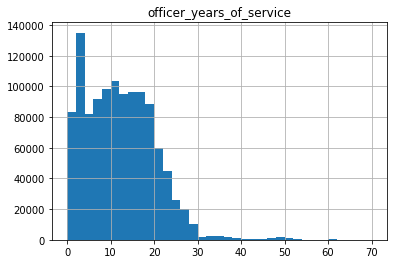

In [27]:
all_data.hist(column='officer_years_of_service', bins=35, range=[0, 70])